# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

## Scrapiing

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Preprocessing

In [ ]:
df.shape

(1000, 3)

Drop Trip Verified

In [ ]:
df['reviews'] = df['reviews'].str.replace("✅ Trip Verified", "", regex=False)
df.head()

,reviews
0,| This time British Airways managed to get ...
1,"| The seats were excellent, with a feel of ..."
2,| After the nightmare of getting through tr...
3,| Prior to boarding a gate agent seemed to ...
4,| I flew from Amsterdam to Las Vegas with a...


Import necessary library

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Prepare the text

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
COMBINE_WHITESPACE_RE = re.compile(r"(?a:\s+)")
STRIP_WHITESPACE_RE = re.compile(r"(?a:^\s+|\s+$)")
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string

        return: modified initial string
    """
    text = text.lower()
    text = re.sub(REPLACE_BY_SPACE_RE, '', text)
    text = re.sub(BAD_SYMBOLS_RE, '', text)

    word_tokens = word_tokenize(text)

    filtered_sentence = []

    for w in word_tokens:
      if w not in STOPWORDS:
        filtered_sentence.append(w)

    text = " ".join(filtered_sentence)
    text = COMBINE_WHITESPACE_RE.sub(" ", text)
    text = STRIP_WHITESPACE_RE.sub("", text)
    return text

Testing

In [ ]:
print(text_prepare(df['reviews'].iloc[1]))

seats excellent feel much room official seat pitch 6ft 1in could sleep couple hours daytime flight blinds point booking window seat view focus seat quality much smiley faces food food middling second meal landing distinctly subpar


Make new column with clean review

In [ ]:
df['clean_reviews'] = df['reviews'].apply(text_prepare)
df.head()

,reviews,clean_reviews
0,| This time British Airways managed to get ...,time british airways managed get everything ri...
1,"| The seats were excellent, with a feel of ...",seats excellent feel much room official seat p...
2,| After the nightmare of getting through tr...,nightmare getting triple security nairobi airp...
3,| Prior to boarding a gate agent seemed to ...,prior boarding gate agent seemed pick elderly ...
4,| I flew from Amsterdam to Las Vegas with a...,flew amsterdam las vegas layover heathrow nove...


## Analysis

### Word Cloud

In [ ]:
from collections import Counter

In [ ]:
words_counts = {}

all_words_temp = []
all_words_now = []
for i in range(len(df)):
  tokenizer = nltk.tokenize.WhitespaceTokenizer()
  all_words_temp.append(tokenizer.tokenize(df['clean_reviews'][i]))

for i in range(len(all_words_temp)):
  for j in range(len(all_words_temp[i])):
    all_words_now.append(all_words_temp[i][j])

words_counts = Counter(all_words_now)

In [ ]:
words_counts

Counter({'time': 541,
         'british': 450,
         'airways': 430,
         'managed': 49,
         'get': 397,
         'everything': 38,
         'right': 46,
         'price': 65,
         'tickets': 64,
         'reasonable': 27,
         'timing': 8,
         'perfect': 7,
         'boarding': 261,
         'smooth': 35,
         'seats': 384,
         'comfortable': 116,
         'easy': 45,
         'reline': 1,
         'enable': 3,
         'dozing': 1,
         'sufficient': 11,
         'pitch': 8,
         'table': 13,
         'firm': 3,
         'enough': 95,
         'allow': 28,
         'use': 112,
         'small': 117,
         'laptop': 15,
         'mouse': 1,
         'preflight': 6,
         'soft': 6,
         'drink': 82,
         'prosecco': 4,
         'offered': 155,
         'food': 438,
         'best': 80,
         'part': 44,
         'cabin': 365,
         'crew': 454,
         'two': 175,
         'pe': 5,
         'extremely': 59,
         'effic

In [ ]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words[:10]

[('flight', 1993),
 ('ba', 1279),
 ('service', 737),
 ('time', 541),
 ('london', 458),
 ('crew', 454),
 ('british', 450),
 ('seat', 446),
 ('food', 438),
 ('us', 438)]

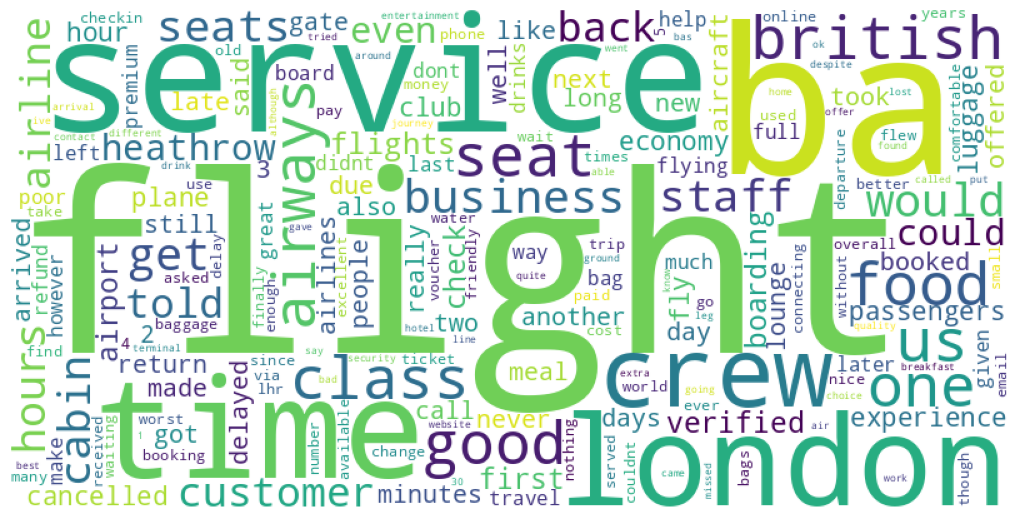

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_dict = dict(most_common_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### Topic Modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_reviews'])

# Apply LDA
LDA = LatentDirichletAllocation(n_components=4, random_state=42) # You can adjust n_components
LDA.fit(dtm)

# Get the top words for each topic
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')


THE TOP 15 WORDS FOR TOPIC #0
['food', 'check', 'seat', 'london', 'passengers', 'lounge', 'staff', 'service', 'boarding', 'cabin', 'good', 'ba', 'time', 'crew', 'flight']


THE TOP 15 WORDS FOR TOPIC #1
['fly', 'booking', 'luggage', 'change', 'bag', 'travel', 'seat', 'ticket', 'told', 'customer', 'ba', 'service', 'flight', 'airways', 'british']


THE TOP 15 WORDS FOR TOPIC #2
['meal', 'time', 'club', 'economy', 'crew', 'cabin', 'seats', 'good', 'seat', 'service', 'business', 'food', 'class', 'flight', 'ba']


THE TOP 15 WORDS FOR TOPIC #3
['flights', 'booked', 'airline', 'time', 'airways', 'airport', 'british', 'customer', 'told', 'cancelled', 'service', 'london', 'hours', 'ba', 'flight']




### Sentiment Analysis

In [ ]:

from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['clean_reviews'].apply(analyze_sentiment)
print(df[['clean_reviews', 'sentiment']].head())


                                       clean_reviews sentiment
0  time british airways managed get everything ri...  positive
1  seats excellent feel much room official seat p...  positive
2  nightmare getting triple security nairobi airp...   neutral
3  prior boarding gate agent seemed pick elderly ...   neutral
4  flew amsterdam las vegas layover heathrow nove...   neutral


In [ ]:
df[df['sentiment'] == 'negative']

,reviews,clean_reviews,sentiment
7,"| Terrible overall, medium service and the fl...",terrible overall medium service flight delayed...,negative
13,| The check in process and reward/loyalty pro...,check process rewardloyalty program mess never...,negative
24,| I'm so fraustrated. My flight was cancell...,im fraustrated flight cancelled last minute wa...,negative
26,Not Verified | British Airways stranding my w...,verified british airways stranding wife heathr...,negative
49,| We booked two business class seat with Br...,booked two business class seat british airways...,negative
...,...,...,...
980,| Los Angeles to Istanbul via London. Flight...,los angeles istanbul via london flight london ...,negative
981,| Phoenix to Tel Aviv via London. The return ...,phoenix tel aviv via london return london phoe...,negative
987,| London to Bangkok. What an awful plane. Se...,london bangkok awful plane seats ok going comi...,negative
990,| Orlando to Gatwick. Terrible flight experi...,orlando gatwick terrible flight experience bed...,negative


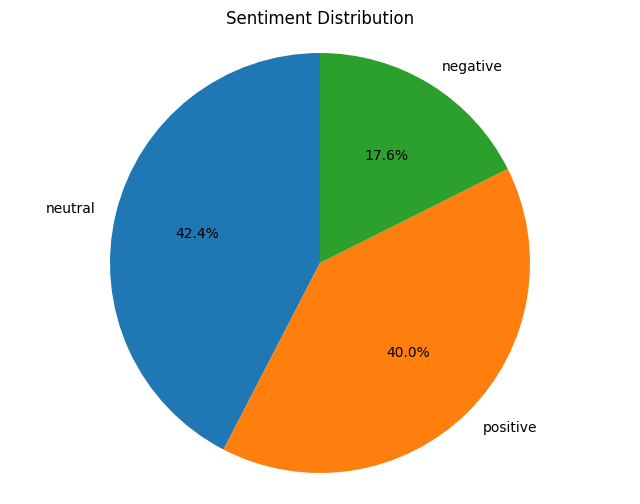

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
